<a href="https://colab.research.google.com/github/troymerales/python-notebooks-nm/blob/main/Numerical_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Interpolation
Interpolation is a mathematical method that allows us to estimate values of an unknown variable when given the data of known variables. In this notebook, we will discuss two methods of interpolation: **Newton's Polynomial Interpolation** and **Lagrange Interpolation**

# Newton's Polynomial Interpolation
Newton's polynomial interpolation builds the polynomial using divided differences, which allows for efficient updating when new data points are added. It's better suited for sequential data and is easier to implement in code for large datasets.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def newPolyInt(y_data,x_data,x):
    n=len(y_data)
    coef=np.zeros((n,n))
    coef[:,0]=y_data
    for j in range(1,n):
        for i in range(n-j):
            coef[i,j]= (coef[i+1,j-1]-coef[i,j-1])/(x_data[i+j]-x_data[i])
    f=coef[0,n-1]
    for k in range(1,n):
        f=coef[0,n-k-1]+(x-x_data[n-k-1])*f
    return f

Given a set of data, where $x$-values are integers from $1-10$ and $y=\log{x}$, we evalute at $x=2\pi$.

In [ ]:
x_data=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data=np.array(np.log(x_data))
x=(2*np.pi)

Applying Newton's Polynomial Interpolation, we have

In [ ]:
f=float(newPolyInt(y_data,x_data,x))
f

1.8378897834014372

To visualize this, we make use of plots.

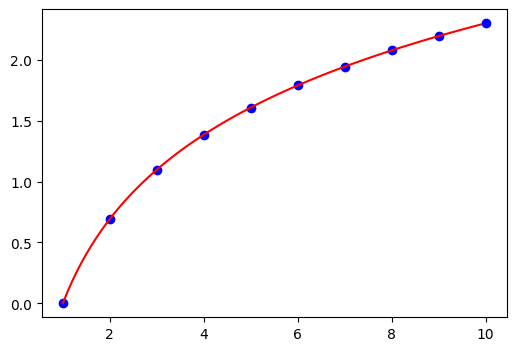

In [ ]:
x_n = np.arange(1, 10, 0.1)
y_n = np.log(x_n)
plt.figure(figsize = (6, 4))
plt.plot(x_data, y_data, 'bo')
plt.plot(x_n, np.log(x_n),'r')

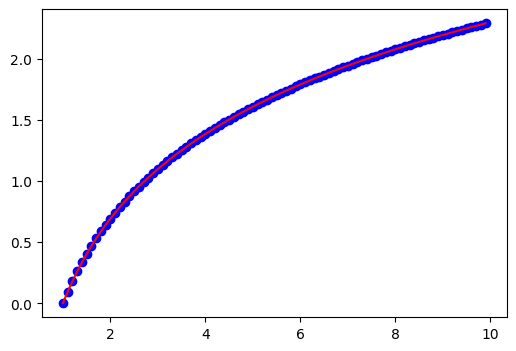

In [ ]:
x_n = np.arange(1, 10, 0.1)
y=newPolyInt(y_data,x_data,x_n)
plt.figure(figsize = (6, 4))
plt.plot(x_n, np.log(x_n), 'bo')
plt.plot(x_n, y,'r')

# Lagrange Interpolation
Lagrange interpolation constructs a single polynomial that passes through all given data points using weighted basis polynomials. It's simple and does not require solving systems of equations, but becomes inefficient if new points are added.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def lagPolyInt(x, x_data, y_data):
    total = 0
    n = len(x_data)
    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if i != j:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        total += term
    return total

Suppose we have a set of $x$-values, which are from $-1$ to $0.2$ with $0.2$ increments, and $y$-values where $y=f(x)=3\sin{2\pi x} + \sin{8\pi x} +0.5\sin{7\pi x}$.

In [ ]:
f = lambda x: 3 * np.sin(2 * np.pi * x) + np.sin(8 * np.pi * x) + 0.5 * np.sin(7 * np.pi * x)
x=np.arange(-1, 1.2, 0.2)
y=np.array(f(x))
x_pt=np.arange(-1,1.1,0.1)

Applying Lagrange Interpolation, we have

In [ ]:
lagPolyInt(x,y,x_pt)

array([-6.93384634e+26,  5.20975968e+26,  1.33688805e+27,  1.13450151e+27,
        3.90414207e+26, -1.13878024e+00,  3.90414207e+26,  1.13450151e+27,
        1.33688805e+27,  5.20975968e+26, -6.93384634e+26])

To visualize this, we have the following graph:

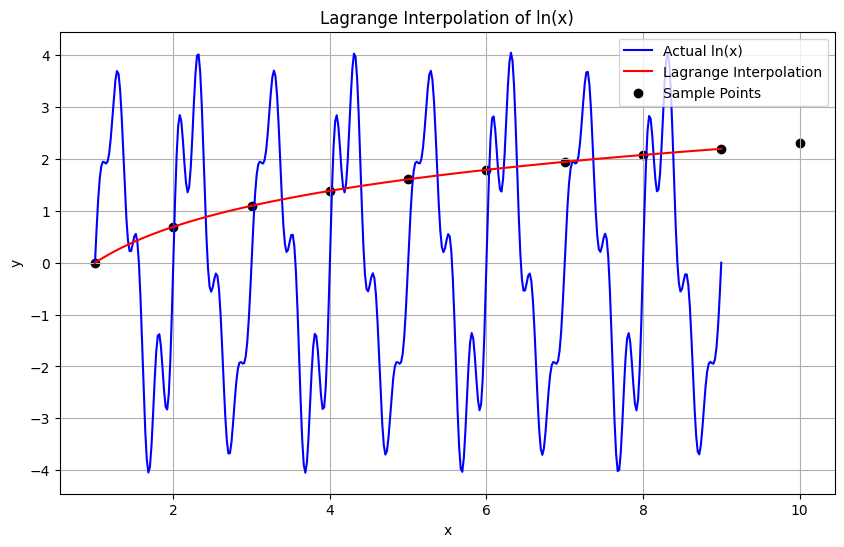

In [ ]:
x_plot = np.linspace(1, 9, 400)
y_actual = f(x_plot)

y_interpolated = [lagPolyInt(x_val, x_data, y_data) for x_val in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_actual, label='Actual ln(x)', color='blue')
plt.plot(x_plot, y_interpolated, label='Lagrange Interpolation', color='red')
plt.scatter(x_data, y_data, color='black', label='Sample Points')
plt.title("Lagrange Interpolation of ln(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()